In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Carga del archivo consolidado. Años 2023 y 2024

In [4]:
import pandas as pd

# Reemplaza 'ruta/a/tu/archivo.csv' con la ruta real de tu archivo en Google Drive
file_path = '/content/drive/MyDrive/Consultoria/datos_abiertos_seguridad_convivencia/data/raw/df_consolidado_2023_2024.csv'

try:
    df_2023_2024 = pd.read_csv(file_path)
    print("Archivo CSV cargado exitosamente.")
    display(df_2023_2024.head())
except FileNotFoundError:
    print(f"Error: El archivo no se encontró en la ruta especificada: {file_path}")
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo: {e}")

/tmp/ipython-input-597511579.py:7: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2023_2024 = pd.read_csv(file_path)


Archivo CSV cargado exitosamente.


,ARMAS MEDIOS,DEPARTAMENTO,MUNICIPIO,FECHA HECHO,GENERO,AGRUPA_EDAD_PERSONA,CODIGO DANE,CANTIDAD,TIPO_DELITO,DELITOS
0,ARMA BLANCA / CORTOPUNZANTE,AMAZONAS,LETICIA,2023-06-13,MASCULINO,ADULTOS,91001000.0,1.0,AMENAZAS,NaN
1,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,AMAGÁ,2023-06-26,FEMENINO,ADULTOS,5030000.0,1.0,AMENAZAS,NaN
2,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,ANDES,2023-09-06,FEMENINO,ADULTOS,5034000.0,1.0,AMENAZAS,NaN
3,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,ANGOSTURA,2023-05-05,MASCULINO,ADULTOS,5038000.0,1.0,AMENAZAS,NaN
4,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,BELLO,2023-02-23,FEMENINO,ADULTOS,5088000.0,1.0,AMENAZAS,NaN


In [5]:
df_2023_2024.sample(10)

,ARMAS MEDIOS,DEPARTAMENTO,MUNICIPIO,FECHA HECHO,GENERO,AGRUPA_EDAD_PERSONA,CODIGO DANE,CANTIDAD,TIPO_DELITO,DELITOS
126165,SIN EMPLEO DE ARMAS,SUCRE,SINCELEJO,2023-04-12,FEMENINO,ADULTOS,70001000.0,1.0,VIOLENCIA INTRAFAMILIAR,NaN
286975,SIN EMPLEO DE ARMAS,ANTIOQUIA,ITAGUI,2023-04-09,NaN,NaN,5360000.0,3.0,HURTO MOTOCICLETAS,NaN
46347,LLAMADA TELEFONICA,VALLE,CALI,2023-12-16,FEMENINO,ADULTOS,76001000.0,1.0,EXTORSIÓN,NaN
430078,SIN EMPLEO DE ARMAS,VALLE,JAMUNDÍ,2024-10-11,FEMENINO,ADOLESCENTES,76364000.0,1.0,AMENAZAS,NaN
193901,ARMA DE FUEGO,CAUCA,SANTANDER DE QUILICHAO,2023-05-09,MASCULINO,ADULTOS,19698000.0,1.0,HURTO A PERSONAS,NaN
388465,SIN EMPLEO DE ARMAS,CUNDINAMARCA,VILLAPINZÓN,2023-03-02,FEMENINO,MENORES,25873000.0,1.0,DELITOS SEXUALES,ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS
532105,ARMA DE FUEGO,META,GRANADA,2024-07-26,FEMENINO,ADULTOS,50313000.0,1.0,HURTO RESIDENCIAS,NaN
356056,SIN EMPLEO DE ARMAS,CAQUETÁ,EL DONCELLO,2023-11-26,FEMENINO,ADULTOS,18247000.0,1.0,LESIONES PERSONALES,NaN
336332,CONTUNDENTES,CUNDINAMARCA,CHÍA,2023-01-11,MASCULINO,ADULTOS,25175000.0,2.0,LESIONES PERSONALES,NaN
567543,ARMA BLANCA / CORTOPUNZANTE,CUNDINAMARCA,FACATATIVÁ,2024-06-14,MASCULINO,ADULTOS,25269000.0,1.0,HURTO A PERSONAS,NaN


### Integración con Divipola

In [6]:
file_path = '/content/drive/MyDrive/Consultoria/datos_abiertos_seguridad_convivencia/data/raw/DIVIPOLA-_Códigos_municipios_20250904.csv'
df_divipola = pd.read_csv(file_path)

In [7]:
df_divipola.head()

,Código Departamento,Nombre Departamento,Código Municipio,Nombre Municipio,Tipo: Municipio / Isla / Área no municipalizada,longitud,Latitud
0,5,ANTIOQUIA,5001,MEDELLÍN,Municipio,"-75,581775","6,246631"
1,5,ANTIOQUIA,5002,ABEJORRAL,Municipio,"-75,428739","5,789315"
2,5,ANTIOQUIA,5004,ABRIAQUÍ,Municipio,"-76,064304","6,632282"
3,5,ANTIOQUIA,5021,ALEJANDRÍA,Municipio,"-75,141346","6,376061"
4,5,ANTIOQUIA,5030,AMAGÁ,Municipio,"-75,702188","6,038708"


In [9]:
# "right merge" para asegurarme de que todos los municipios del DataFrame df_divipola estén incluidos en el resultado.
df_delitos23_24_divipola = pd.merge(df_2023_2024, df_divipola, left_on='MUNICIPIO', right_on='Nombre Municipio', how='right')
display(df_delitos23_24_divipola.head())

,ARMAS MEDIOS,DEPARTAMENTO,MUNICIPIO,FECHA HECHO,GENERO,AGRUPA_EDAD_PERSONA,CODIGO DANE,CANTIDAD,TIPO_DELITO,DELITOS,Código Departamento,Nombre Departamento,Código Municipio,Nombre Municipio,Tipo: Municipio / Isla / Área no municipalizada,longitud,Latitud
0,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,MEDELLÍN,2023-01-31,FEMENINO,ADULTOS,5001000.0,1.0,AMENAZAS,NaN,5,ANTIOQUIA,5001,MEDELLÍN,Municipio,"-75,581775","6,246631"
1,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,MEDELLÍN,2023-01-31,MASCULINO,ADULTOS,5001000.0,1.0,AMENAZAS,NaN,5,ANTIOQUIA,5001,MEDELLÍN,Municipio,"-75,581775","6,246631"
2,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,MEDELLÍN,2023-02-02,FEMENINO,ADULTOS,5001000.0,1.0,AMENAZAS,NaN,5,ANTIOQUIA,5001,MEDELLÍN,Municipio,"-75,581775","6,246631"
3,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,MEDELLÍN,2023-02-17,MASCULINO,ADULTOS,5001000.0,1.0,AMENAZAS,NaN,5,ANTIOQUIA,5001,MEDELLÍN,Municipio,"-75,581775","6,246631"
4,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,MEDELLÍN,2023-03-03,MASCULINO,ADOLESCENTES,5001000.0,1.0,AMENAZAS,NaN,5,ANTIOQUIA,5001,MEDELLÍN,Municipio,"-75,581775","6,246631"


In [14]:
df_delitos23_24_divipola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701875 entries, 0 to 701874
Data columns (total 17 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   ARMAS MEDIOS                                     701806 non-null  object 
 1   DEPARTAMENTO                                     701806 non-null  object 
 2   MUNICIPIO                                        701806 non-null  object 
 3   FECHA HECHO                                      701806 non-null  object 
 4   GENERO                                           643168 non-null  object 
 5   AGRUPA_EDAD_PERSONA                              646058 non-null  object 
 6   CODIGO DANE                                      701806 non-null  float64
 7   CANTIDAD                                         701806 non-null  float64
 8   TIPO_DELITO                                      701806 non-null  object 
 9   DELITOS        

In [10]:
df_delitos23_24_divipola.sample(10)

,ARMAS MEDIOS,DEPARTAMENTO,MUNICIPIO,FECHA HECHO,GENERO,AGRUPA_EDAD_PERSONA,CODIGO DANE,CANTIDAD,TIPO_DELITO,DELITOS,Código Departamento,Nombre Departamento,Código Municipio,Nombre Municipio,Tipo: Municipio / Isla / Área no municipalizada,longitud,Latitud
53158,SIN EMPLEO DE ARMAS,ANTIOQUIA,CALDAS,2024-02-16,FEMENINO,ADULTOS,5129000.0,1.0,VIOLENCIA INTRAFAMILIAR,NaN,5,ANTIOQUIA,5129,CALDAS,Municipio,"-75,633673","6,091077"
517416,ARMA BLANCA / CORTOPUNZANTE,RISARALDA,SANTA ROSA DE CABAL,2023-05-21,MASCULINO,ADOLESCENTES,66682000.0,1.0,HURTO A PERSONAS,NaN,66,RISARALDA,66682,SANTA ROSA DE CABAL,Municipio,"-75,623268","4,876271"
296251,SIN EMPLEO DE ARMAS,CUNDINAMARCA,FUNZA,2023-06-27,FEMENINO,ADULTOS,25286000.0,1.0,HURTO A PERSONAS,NaN,25,CUNDINAMARCA,25286,FUNZA,Municipio,"-74,201528","4,710412"
620318,ARMA DE FUEGO,VALLE,ALCALÁ,2024-04-11,FEMENINO,ADULTOS,76020000.0,1.0,HURTO A PERSONAS,NaN,76,VALLE DEL CAUCA,76020,ALCALÁ,Municipio,"-75,779792","4,674994"
60181,CONTUNDENTES,ANTIOQUIA,COPACABANA,2023-12-04,MASCULINO,ADULTOS,5212000.0,3.0,LESIONES PERSONALES,NaN,5,ANTIOQUIA,5212,COPACABANA,Municipio,"-75,509384","6,348557"
5532,SIN EMPLEO DE ARMAS,ANTIOQUIA,MEDELLÍN,2023-02-24,NaN,NaN,5001000.0,1.0,HURTO AUTOMOTORES,NaN,5,ANTIOQUIA,5001,MEDELLÍN,Municipio,"-75,581775","6,246631"
447909,SIN EMPLEO DE ARMAS,META,SAN MARTÍN,2024-11-27,MASCULINO,ADULTOS,50689000.0,1.0,LESIONES PERSONALES,NaN,50,META,50689,SAN MARTÍN,Municipio,"-73,695812","3,701899"
341073,SIN EMPLEO DE ARMAS,CUNDINAMARCA,SOACHA,2024-04-20,MASCULINO,ADULTOS,25754000.0,6.0,HURTO A PERSONAS,NaN,25,CUNDINAMARCA,25754,SOACHA,Municipio,"-74,215463","4,579268"
477807,CONTUNDENTES,NARIÑO,SAN LORENZO,2024-05-20,MASCULINO,ADULTOS,52687000.0,1.0,LESIONES PERSONALES,NaN,52,NARIÑO,52687,SAN LORENZO,Municipio,"-77,21542","1,503362"
627033,SIN EMPLEO DE ARMAS,VALLE,GUADALAJARA DE BUGA,2023-10-29,MASCULINO,ADULTOS,76111000.0,1.0,HURTO A PERSONAS,NaN,76,VALLE DEL CAUCA,76111,GUADALAJARA DE BUGA,Municipio,"-76,298979","3,900736"


In [12]:
# Faltantes
missing_values_delitos23_24_divipola = df_delitos23_24_divipola.isnull().sum()
print("Cantidad de valores faltantes por columna en el DataFrame combinado:")
print(missing_values_delitos23_24_divipola)

Cantidad de valores faltantes por columna en el DataFrame combinado:
ARMAS MEDIOS                                           69
DEPARTAMENTO                                           69
MUNICIPIO                                              69
FECHA HECHO                                            69
GENERO                                              58707
AGRUPA_EDAD_PERSONA                                 55817
CODIGO DANE                                            69
CANTIDAD                                               69
TIPO_DELITO                                            69
DELITOS                                            662410
Código Departamento                                     0
Nombre Departamento                                     0
Código Municipio                                        0
Nombre Municipio                                        0
Tipo: Municipio / Isla / Área no municipalizada         0
longitud                                                0
Lat

### Características poblacionales

In [20]:
# Cargar una hoja específica de un archivo Excel
# Omitir la primera fila de registros (al ser integrada a la de nombres de
# de columna figura como nan)
df_poblacion = pd.read_excel('/content/drive/MyDrive/Consultoria/datos_abiertos_seguridad_convivencia/data/raw/PPED-AreaMun-2018-2042_VP.xlsx', sheet_name='PobMunicipalxÁrea', header=7)
# Omitir la primera fila de registros
df_poblacion = df_poblacion.iloc[1:].copy()
df_poblacion.head()

,DP,DPNOM,MPIO,DPMP,AÑO,ÁREA GEOGRÁFICA,TOTAL
1,05,Antioquia,5001.0,Medellín,2018.0,Cabecera Municipal,2382405.0
2,05,Antioquia,5001.0,Medellín,2018.0,Centros Poblados y Rural Disperso,44728.0
3,05,Antioquia,5001.0,Medellín,2018.0,Total,2427133.0
4,05,Antioquia,5002.0,Abejorral,2018.0,Cabecera Municipal,7669.0
5,05,Antioquia,5002.0,Abejorral,2018.0,Centros Poblados y Rural Disperso,12699.0


In [21]:
# Filtrar por solo valores totales (no discrimina entre centro poblado y
# cabezera municipal) y por año: restringido al 2025
# variables a mayúscula sostenida para unificar
df_poblacion = df_poblacion[(df_poblacion['AÑO'] == 2023.0) | (df_poblacion['AÑO'] == 2024.0)].copy()
df_poblacion.loc[:, 'DPNOM'] = df_poblacion['DPNOM'].str.upper()
df_poblacion.loc[:, 'DPMP'] = df_poblacion['DPMP'].str.upper()
display(df_poblacion.head())

,DP,DPNOM,MPIO,DPMP,AÑO,ÁREA GEOGRÁFICA,TOTAL
16846,05,ANTIOQUIA,5001.0,MEDELLÍN,2023.0,Cabecera Municipal,2469958.0
16847,05,ANTIOQUIA,5001.0,MEDELLÍN,2023.0,Centros Poblados y Rural Disperso,48522.0
16848,05,ANTIOQUIA,5001.0,MEDELLÍN,2023.0,Total,2518480.0
16849,05,ANTIOQUIA,5002.0,ABEJORRAL,2023.0,Cabecera Municipal,8350.0
16850,05,ANTIOQUIA,5002.0,ABEJORRAL,2023.0,Centros Poblados y Rural Disperso,12680.0


In [22]:
df_final2023_24 = pd.merge(df_delitos23_24_divipola, df_poblacion[['DPMP', 'TOTAL']], left_on='MUNICIPIO', right_on='DPMP', how='left')
display(df_final2023_24.head())

,ARMAS MEDIOS,DEPARTAMENTO,MUNICIPIO,FECHA HECHO,GENERO,AGRUPA_EDAD_PERSONA,CODIGO DANE,CANTIDAD,TIPO_DELITO,DELITOS,Código Departamento,Nombre Departamento,Código Municipio,Nombre Municipio,Tipo: Municipio / Isla / Área no municipalizada,longitud,Latitud,DPMP,TOTAL
0,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,MEDELLÍN,2023-01-31,FEMENINO,ADULTOS,5001000.0,1.0,AMENAZAS,NaN,5,ANTIOQUIA,5001,MEDELLÍN,Municipio,"-75,581775","6,246631",MEDELLÍN,2469958.0
1,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,MEDELLÍN,2023-01-31,FEMENINO,ADULTOS,5001000.0,1.0,AMENAZAS,NaN,5,ANTIOQUIA,5001,MEDELLÍN,Municipio,"-75,581775","6,246631",MEDELLÍN,48522.0
2,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,MEDELLÍN,2023-01-31,FEMENINO,ADULTOS,5001000.0,1.0,AMENAZAS,NaN,5,ANTIOQUIA,5001,MEDELLÍN,Municipio,"-75,581775","6,246631",MEDELLÍN,2518480.0
3,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,MEDELLÍN,2023-01-31,FEMENINO,ADULTOS,5001000.0,1.0,AMENAZAS,NaN,5,ANTIOQUIA,5001,MEDELLÍN,Municipio,"-75,581775","6,246631",MEDELLÍN,2476134.0
4,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,MEDELLÍN,2023-01-31,FEMENINO,ADULTOS,5001000.0,1.0,AMENAZAS,NaN,5,ANTIOQUIA,5001,MEDELLÍN,Municipio,"-75,581775","6,246631",MEDELLÍN,48613.0


In [23]:
df_final2023_24.to_csv('df_final2023_24.csv', index=False)
print("El DataFrame se ha guardado como 'df_final2023_24.csv'. Puedes descargarlo desde el panel de archivos a la izquierda o usar el siguiente enlace:")

from google.colab import files
files.download('df_final2023_24.csv')

El DataFrame se ha guardado como 'df_final2023_24.csv'. Puedes descargarlo desde el panel de archivos a la izquierda o usar el siguiente enlace:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

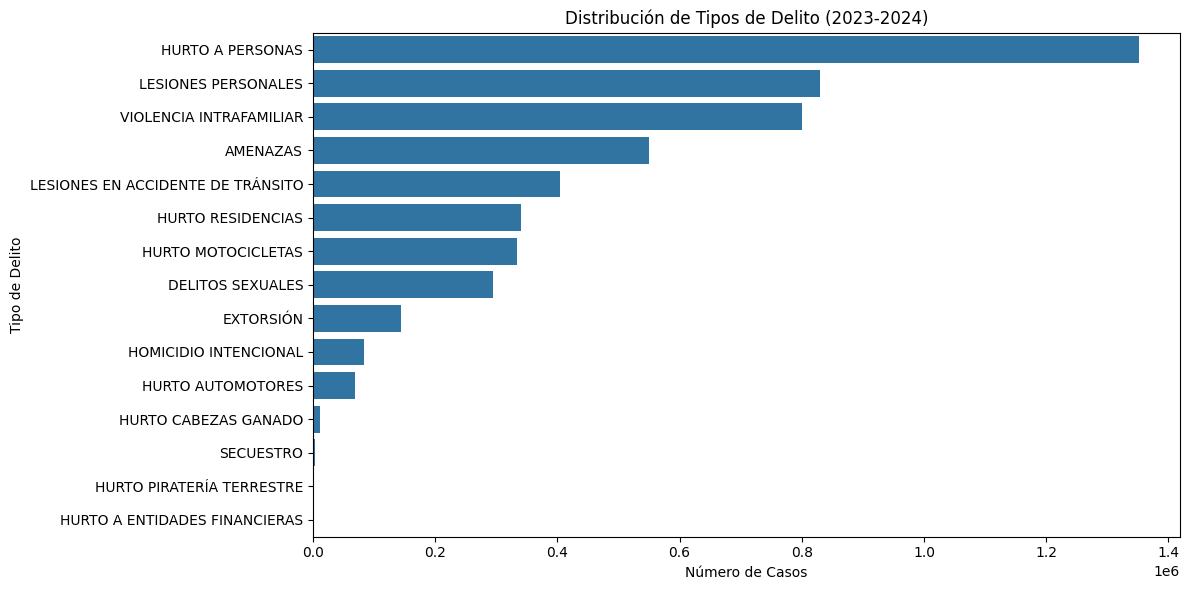

/tmp/ipython-input-3461758752.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_crimes = df_final2023_24.groupby(pd.Grouper(key='FECHA HECHO', freq='M')).size().reset_index(name='count')


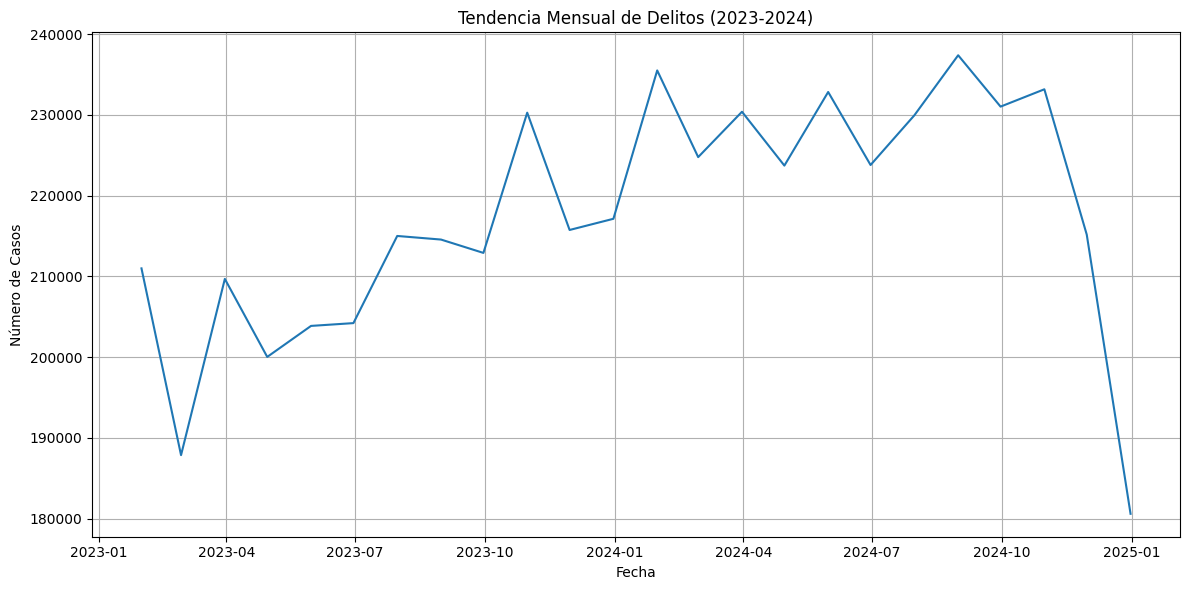

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribución de Tipos de Delito
plt.figure(figsize=(12, 6))
sns.countplot(data=df_final2023_24, y='TIPO_DELITO', order=df_final2023_24['TIPO_DELITO'].value_counts().index)
plt.title('Distribución de Tipos de Delito (2023-2024)')
plt.xlabel('Número de Casos')
plt.ylabel('Tipo de Delito')
plt.tight_layout()
plt.show()

# 2. Tendencia de Delitos a lo largo del tiempo (Mensual)

# Convertir la columna de fecha a datetime
df_final2023_24['FECHA HECHO'] = pd.to_datetime(df_final2023_24['FECHA HECHO'], errors='coerce')

# Eliminar filas con fechas no válidas después de la conversión
df_final2023_24.dropna(subset=['FECHA HECHO'], inplace=True)

# Agrupar por mes y contar delitos
df_monthly_crimes = df_final2023_24.groupby(pd.Grouper(key='FECHA HECHO', freq='M')).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_monthly_crimes, x='FECHA HECHO', y='count')
plt.title('Tendencia Mensual de Delitos (2023-2024)')
plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.grid(True)
plt.tight_layout()
plt.show()

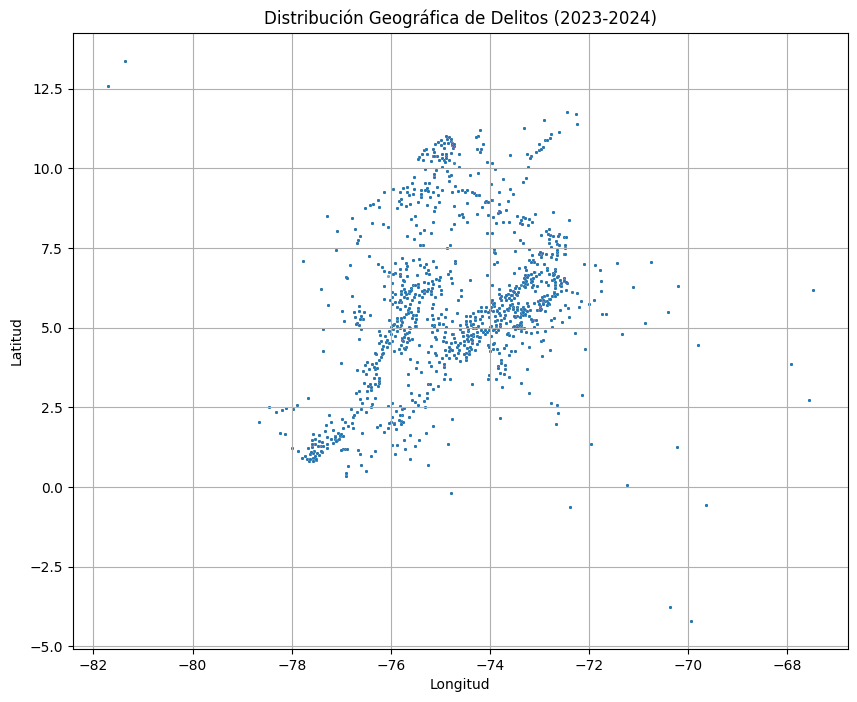

In [25]:
# Convertir las columnas de longitud y latitud a numérico
df_final2023_24['longitud'] = df_final2023_24['longitud'].str.replace(',', '.', regex=False).astype(float)
df_final2023_24['Latitud'] = df_final2023_24['Latitud'].str.replace(',', '.', regex=False).astype(float)

# Eliminar filas con valores nulos en longitud o latitud después de la conversión
df_final2023_24.dropna(subset=['longitud', 'Latitud'], inplace=True)

# Visualizar la distribución geográfica de los delitos
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_final2023_24, x='longitud', y='Latitud', alpha=0.05, s=5) # Usamos alpha y s para manejar la gran cantidad de puntos
plt.title('Distribución Geográfica de Delitos (2023-2024)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()